In [1]:
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

Using TensorFlow backend.


# Traning Data

In [2]:
train_labels = []
train_samples = []


    
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_order = randint(65,100)
    train_samples.append(random_order)
    train_labels.append(0)
    
    
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_order = randint(65,100)
    train_samples.append(random_order)
    train_labels.append(1)

    
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

scaler = MinMaxScaler(feature_range=(0,1))

scaler_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

/home/sakib/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [3]:
scaler_train_samples

array([[0.22988506],
       [0.81609195],
       [0.4137931 ],
       ...,
       [0.89655172],
       [0.17241379],
       [0.62068966]])

# Test Data

In [4]:
test_labels = []
test_samples = []


    
for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_order = randint(65,100)
    test_samples.append(random_order)
    test_labels.append(0)
    
    
for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_order = randint(65,100)
    test_samples.append(random_order)
    test_labels.append(1)

    
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

scaler = MinMaxScaler(feature_range=(0,1))

scaler_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

/home/sakib/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
scaler_test_samples

array([[0.31034483],
       [0.93103448],
       [0.05747126],
       [0.73563218],
       [0.43678161],
       [0.88505747],
       [0.11494253],
       [0.63218391],
       [0.40229885],
       [0.81609195],
       [0.18390805],
       [0.77011494],
       [0.27586207],
       [0.59770115],
       [0.08045977],
       [0.67816092],
       [0.1954023 ],
       [0.66666667],
       [0.27586207],
       [0.8045977 ],
       [0.01149425],
       [0.75862069],
       [0.24137931],
       [0.62068966],
       [0.10344828],
       [0.94252874],
       [0.40229885],
       [0.77011494],
       [0.32183908],
       [0.97701149],
       [0.09195402],
       [0.93103448],
       [0.25287356],
       [0.63218391],
       [0.37931034],
       [0.89655172],
       [0.34482759],
       [0.91954023],
       [0.09195402],
       [0.65517241],
       [0.43678161],
       [0.83908046],
       [0.24137931],
       [0.67816092],
       [0.37931034],
       [0.6091954 ],
       [0.33333333],
       [0.643

# Model Build

In [6]:
model = Sequential([
    Dense(16,input_shape=(1,),activation="relu"),
    Dense(32,activation="relu"),
    Dense(2,activation="softmax")
    
])

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    Adam(lr=.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

In [9]:
#valid_set = [(sample,lable),(sample,lable),-,(sample,lable)]

In [10]:
model.fit(scaler_train_samples,train_labels,validation_split=0.1,batch_size=10,
          epochs=20,shuffle=True,verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 1s - loss: 0.6851 - acc: 0.5238 - val_loss: 0.6663 - val_acc: 0.5810
Epoch 2/20
 - 0s - loss: 0.6575 - acc: 0.5873 - val_loss: 0.6328 - val_acc: 0.7048
Epoch 3/20
 - 0s - loss: 0.6296 - acc: 0.6651 - val_loss: 0.5965 - val_acc: 0.7857
Epoch 4/20
 - 0s - loss: 0.6014 - acc: 0.7291 - val_loss: 0.5645 - val_acc: 0.8095
Epoch 5/20
 - 0s - loss: 0.5748 - acc: 0.7619 - val_loss: 0.5311 - val_acc: 0.8333
Epoch 6/20
 - 0s - loss: 0.5479 - acc: 0.7751 - val_loss: 0.4979 - val_acc: 0.8619
Epoch 7/20
 - 0s - loss: 0.5207 - acc: 0.8048 - val_loss: 0.4646 - val_acc: 0.8810
Epoch 8/20
 - 0s - loss: 0.4941 - acc: 0.8233 - val_loss: 0.4322 - val_acc: 0.9000
Epoch 9/20
 - 0s - loss: 0.4683 - acc: 0.8349 - val_loss: 0.4020 - val_acc: 0.9238
Epoch 10/20
 - 0s - loss: 0.4445 - acc: 0.8608 - val_loss: 0.3726 - val_acc: 0.9238
Epoch 11/20
 - 0s - loss: 0.4224 - acc: 0.8677 - val_loss: 0.3468 - val_acc: 0.9238
Epoch 12/20
 - 0s - loss: 0.4027 - acc

In [11]:
#model.fit(scaler_train_samples,train_labels,batch_size=10,epochs=20,shuffle=True,verbose=2)

# Predict

In [12]:
predictions = model.predict(scaler_test_samples,batch_size=10,verbose=0)

In [13]:
for i in predictions:
    print(i)

[0.879465   0.12053498]
[0.05365638 0.94634366]
[0.9105852  0.08941478]
[0.19532564 0.8046744 ]
[0.7313445  0.26865548]
[0.06904177 0.9309583 ]
[0.91183275 0.08816723]
[0.359154 0.640846]
[0.78251195 0.21748799]
[0.11238971 0.8876103 ]
[0.913309   0.08669094]
[0.15516138 0.8448386 ]
[0.8987832  0.10121673]
[0.42552635 0.5744737 ]
[0.91108614 0.08891386]
[0.27870017 0.7212998 ]
[0.9135529  0.08644706]
[0.29776806 0.7022319 ]
[0.8987833  0.10121672]
[0.1220038  0.87799627]
[0.90957576 0.09042428]
[0.1677428  0.83225715]
[0.91101503 0.08898497]
[0.38082036 0.61917967]
[0.91158456 0.08841546]
[0.05085649 0.94914347]
[0.78251195 0.21748799]
[0.15516138 0.8448386 ]
[0.87128884 0.12871115]
[0.04326453 0.9567355 ]
[0.9113357  0.08866436]
[0.05365638 0.94634366]
[0.9081352  0.09186479]
[0.359154 0.640846]
[0.81249523 0.18750475]
[0.06432995 0.9356701 ]
[0.8513484  0.14865157]
[0.05661592 0.94338405]
[0.9113357  0.08866436]
[0.31756642 0.6824336 ]
[0.7313445  0.26865548]
[0.09513395 0.9048661 ]


In [14]:
rounded_predections = model.predict_classes(scaler_test_samples,batch_size=10,verbose=0)

In [15]:
for i in rounded_predections:
    print(i)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


# Confussion Matrix

In [16]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [17]:
cm = confusion_matrix(test_labels,rounded_predections)

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[194  16]
 [ 10 200]]


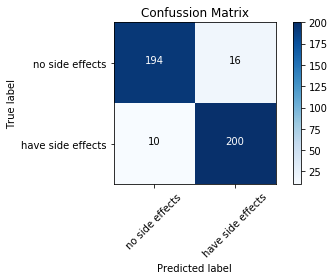

In [19]:
cm_plot_labels = ['no side effects', 'have side effects']
plot_confusion_matrix(cm,cm_plot_labels,title='Confussion Matrix')

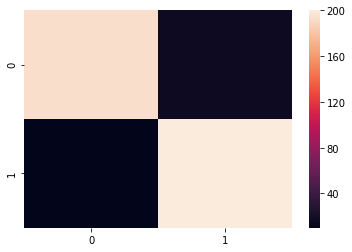

In [20]:
sns.heatmap(confusion_matrix(test_labels,rounded_predections))

In [21]:
cm

array([[194,  16],
       [ 10, 200]])

In [22]:
rounded_predections[0]

0

In [23]:
test_labels[0]

1

In [24]:
len(test_labels)

420

# 1. Model.save()

In [26]:
model.save("medical_trial_model.h5")

In [27]:
from keras.models import load_model
new_model = load_model("medical_trial_model.h5")

In [28]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [29]:
new_model.get_weights()

[array([[ 0.43316412,  0.6278476 ,  0.04767842, -0.4395356 ,  0.1857335 ,
          0.4937204 , -0.40293267, -0.21193275,  0.54742503,  0.4020512 ,
          0.19780967, -0.2814079 ,  0.57235986, -0.33324492, -0.4017793 ,
         -0.32307222]], dtype=float32),
 array([-0.10237389, -0.13319898,  0.18504284,  0.        ,  0.13191299,
        -0.12085693,  0.        ,  0.        ,  0.04111263, -0.1041343 ,
        -0.04166049,  0.        , -0.13074388,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[ 6.54550195e-02, -4.26955819e-01,  1.62366956e-01,
          4.03073609e-01,  2.43196011e-01,  2.33729318e-01,
         -4.89236154e-02,  2.49799997e-01, -3.27528715e-01,
         -1.34732889e-03, -2.68024743e-01,  3.15056264e-01,
          4.77217436e-01, -5.47070540e-02,  2.45857537e-02,
         -9.93839502e-02, -6.86885715e-02,  2.18042359e-01,
          1.40804961e-01,  3.77102524e-01, -1.82522565e-01,
          5.30214347e-02, -2.79764891e-01, -2.83658504e-04,
 

In [30]:
new_model.optimizer

# 2. Model.to_json()

In [33]:
#save as JSON
json_string = model.to_json()

#save as YAML
#ymal_string = model.to_yaml()


In [34]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": 

In [36]:
#model reconstruction from JSON:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

#model reconstructrition from YAML
#from keras.models import model_-from_yaml
#model = model_from_yaml

In [37]:
model_architecture.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________



# 3. model.save_weight

In [42]:
model.save_weights("my_model_saved_weight.h5")

In [43]:
model2 = Sequential([
    Dense(16,input_shape=(1,),activation="relu"),
    Dense(32,activation="relu"),
    Dense(2,activation="softmax"),
    
])

In [44]:
model2.load_weights("my_model_saved_weight.h5")

In [45]:
model2.weights

[<tf.Variable 'dense_7/kernel:0' shape=(1, 16) dtype=float32_ref>,
 <tf.Variable 'dense_7/bias:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'dense_8/kernel:0' shape=(16, 32) dtype=float32_ref>,
 <tf.Variable 'dense_8/bias:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'dense_9/kernel:0' shape=(32, 2) dtype=float32_ref>,
 <tf.Variable 'dense_9/bias:0' shape=(2,) dtype=float32_ref>]